In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("data/data2022.csv", sep=";", decimal=",")

In [3]:
df.head(18)

,Kabupaten,jumlah_penduduk,total_sampah_ton,jumlah_truk,jumlah_motor,jumlah_tps,total_armada,sampah_perpenduduk,sampah_perarmada,sampah_pertps
0,bogor,5556.31,396.53,10,20,235,30,0.071366,13.217667,1.687362
1,sukabumi,2775.31,351.54,14,13,195,27,0.126667,13.020000,1.802769
2,cianjur,2529.81,457.22,2,180,195,182,0.180733,2.512198,2.344718
3,bandung,3687.25,559.62,39,65,210,104,0.151772,5.380962,2.664857
4,garut,2648.95,330.21,9,31,174,40,0.124657,8.255250,1.897759
5,tasikmalaya,1892.22,130.02,2,2,112,4,0.068713,32.505000,1.160893
6,ciamis,1243.32,151.74,9,24,110,33,0.122044,4.598182,1.379455
7,kuningan,1189.01,262.64,8,18,241,26,0.220890,10.101538,1.089793
8,cirebon,2331.36,235,22,62,315,84,0.100800,2.797619,0.746032
9,majalengka,1328.01,155.6,7,3,221,10,0.117168,15.560000,0.704072


In [4]:
df.isna().sum()

Kabupaten             0
jumlah_penduduk       0
total_sampah_ton      0
jumlah_truk           0
jumlah_motor          0
jumlah_tps            0
total_armada          0
sampah_perpenduduk    0
sampah_perarmada      0
sampah_pertps         0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df = df.replace(",", ".", regex=True)
df.columns = df.columns.str.strip().str.lower()

for col in df.columns:
    if col != 'kabupaten':
        df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.dropna()

In [7]:
features = [
    'jumlah_penduduk',
    'total_sampah_ton',
    'jumlah_truk',
    'jumlah_motor',
    'jumlah_tps',
    'total_armada',
    'sampah_perpenduduk',
    'sampah_perarmada',
    'sampah_pertps'
]


In [8]:
X = df[features]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X_pca)

df["cluster"] = cluster

In [12]:
df_cluster = df[
    ["kabupaten", "PC1", "PC2", "cluster"]
].sort_values("cluster")

In [13]:
df_cluster.head(18)

,kabupaten,PC1,PC2,cluster
6,ciamis,-1.272819,-0.704866,0
7,kuningan,-1.024239,0.077112,0
5,tasikmalaya,-2.858553,-0.186216,0
14,karawang,-0.124688,-0.222592,0
12,subang,0.718896,-1.363380,0
13,purwakarta,-0.880623,-1.239928,0
10,sumedang,-1.259498,-0.357401,0
9,majalengka,-2.122650,0.382529,0
17,pangandaran,-1.488147,-2.200123,0
16,bandung barat,-1.022615,-1.130481,0


In [14]:
pca.explained_variance_ratio_

array([0.47524623, 0.17714658])

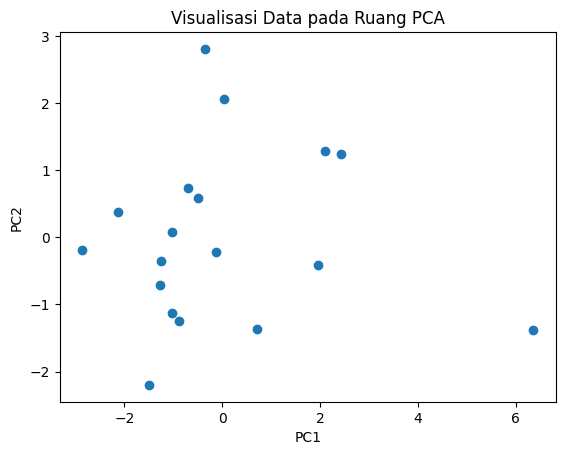

In [15]:
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Data pada Ruang PCA")
plt.show()

In [17]:
pickle.dump(kmeans, open("model2022/kmeans_2022.pkl", "wb"))
pickle.dump(scaler, open("model2022/scaler_2022.pkl", "wb"))
pickle.dump(pca, open("model2022/pca_2022.pkl", "wb"))